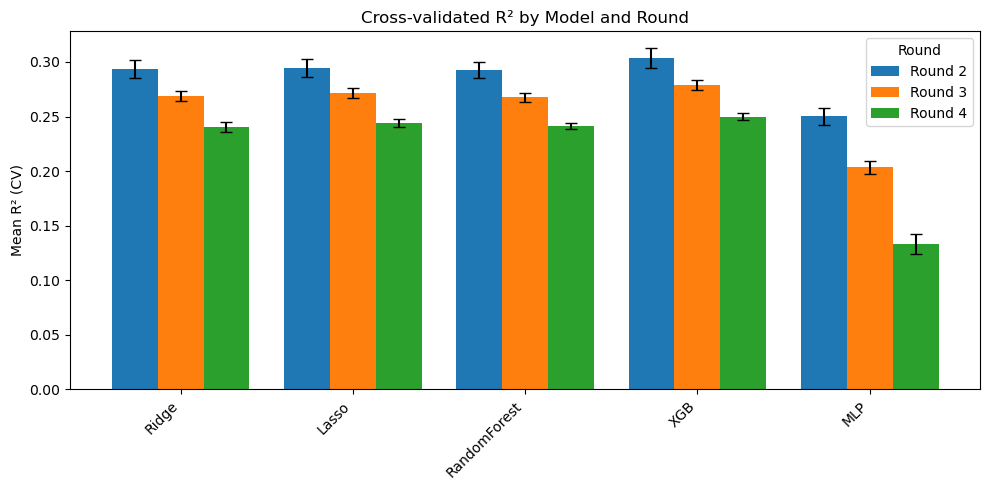

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and tag
dfs = []
for rnd in [2, 3, 4]:
    df = pd.read_csv(f'/rds/general/user/hsl121/home/hda_project/hrqol_cv/results/gad7_round{rnd}/gad7_round{rnd}_gridsearch_cv_full_metrics.csv')
    df['Round'] = f'Round {rnd}'
    dfs.append(df)

all_df = pd.concat(dfs, ignore_index=True)

# === Plot R² with error bars ===
pivot_r2 = all_df.pivot(index='Model', columns='Round', values='Mean R2')
pivot_r2_err = all_df.pivot(index='Model', columns='Round', values='Std Error R2')
# Define desired model order
model_order = ['Ridge', 'Lasso', 'RandomForest', 'XGB', 'MLP']

# Reorder rows in pivot tables
pivot_r2 = pivot_r2.reindex(model_order)
pivot_r2_err = pivot_r2_err.reindex(model_order)


fig, ax = plt.subplots(figsize=(10, 5))
models = pivot_r2.index
rounds = pivot_r2.columns.tolist()
x = np.arange(len(models))
width = 0.8 / len(rounds)

for i, rnd in enumerate(rounds):
    ax.bar(x + i*width, pivot_r2[rnd], width, yerr=pivot_r2_err[rnd], label=rnd, capsize=4)

ax.set_xticks(x + width*(len(rounds)-1)/2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('Mean R² (CV)')
ax.set_title('Cross-validated R² by Model and Round')
ax.legend(title='Round')
plt.tight_layout()
plt.show()


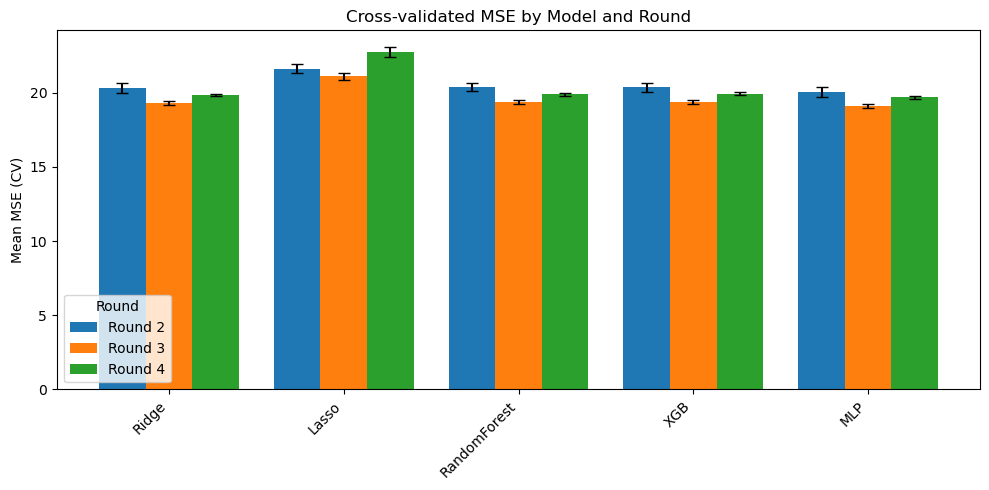

In [6]:
# === Plot MSE with error bars ===
pivot_mse = all_df.pivot(index='Model', columns='Round', values='Mean MSE')
pivot_mse_err = all_df.pivot(index='Model', columns='Round', values='Std Error MSE')
# Define desired model order
model_order = ['Ridge', 'Lasso', 'RandomForest', 'XGB', 'MLP']

# Reorder rows in pivot tables
pivot_r2 = pivot_r2.reindex(model_order)
pivot_r2_err = pivot_r2_err.reindex(model_order)


fig, ax = plt.subplots(figsize=(10, 5))
for i, rnd in enumerate(rounds):
    ax.bar(x + i*width, pivot_mse[rnd], width, yerr=pivot_mse_err[rnd], label=rnd, capsize=4)

ax.set_xticks(x + width*(len(rounds)-1)/2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('Mean MSE (CV)')
ax.set_title('Cross-validated MSE by Model and Round')
ax.legend(title='Round')
plt.tight_layout()
plt.show()


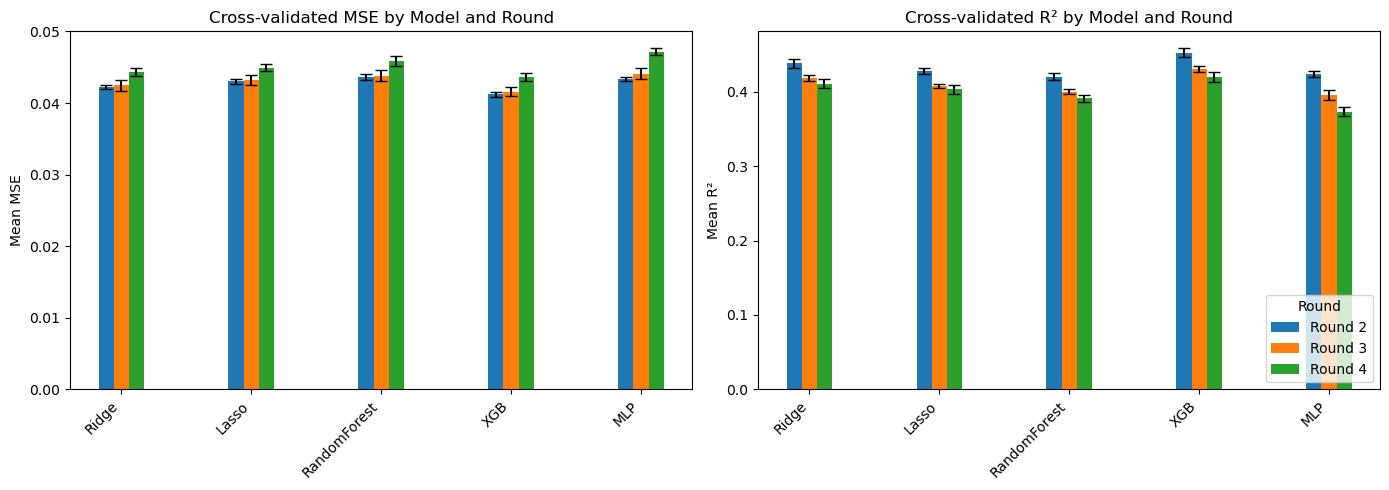

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and tag
dfs = []
for rnd in [2, 3, 4]:
    df = pd.read_csv(f'/rds/general/user/hsl121/home/hda_project/hrqol_cv/results/eq5d_round{rnd}/eq5d_round{rnd}_gridsearch_cv_full_metrics.csv')
    df['Round'] = f'Round {rnd}'
    dfs.append(df)

all_df = pd.concat(dfs, ignore_index=True)

# Desired order
model_order = ['Ridge', 'Lasso', 'RandomForest', 'XGB', 'MLP']

# Pivot and reorder
pivot_mse = all_df.pivot(index='Model', columns='Round', values='Mean MSE').reindex(model_order)
pivot_mse_err = all_df.pivot(index='Model', columns='Round', values='Std Error MSE').reindex(model_order)

pivot_r2 = all_df.pivot(index='Model', columns='Round', values='Mean R2').reindex(model_order)
pivot_r2_err = all_df.pivot(index='Model', columns='Round', values='Std Error R2').reindex(model_order)

# Plot settings
models = pivot_mse.index
rounds = pivot_mse.columns.tolist()
x = np.arange(len(models))
width = 0.35 / len(rounds)

# === Create Subplots ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# --- Plot MSE ---
for i, rnd in enumerate(rounds):
    axes[0].bar(x + i*width, pivot_mse[rnd], width, yerr=pivot_mse_err[rnd], label=rnd, capsize=4)
axes[0].set_ylabel('Mean MSE')
axes[0].set_title('Cross-validated MSE by Model and Round')
axes[0].set_xticks(x + width*(len(rounds)-1)/2)
axes[0].set_xticklabels(models, rotation=45, ha='right')

# --- Plot R² ---
for i, rnd in enumerate(rounds):
    axes[1].bar(x + i*width, pivot_r2[rnd], width, yerr=pivot_r2_err[rnd], label=rnd, capsize=4)
axes[1].set_ylabel('Mean R²')
axes[1].set_title('Cross-validated R² by Model and Round')
axes[1].set_xticks(x + width*(len(rounds)-1)/2)
axes[1].set_xticklabels(models, rotation=45, ha='right')

# Legend (only once)
axes[1].legend(title='Round', loc='lower right')

plt.tight_layout()
plt.savefig(('/rds/general/user/hsl121/home/hda_project/hrqol_cv/eq5d_combined_graph.png'), dpi=300)
plt.show()

